In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 153 kB/s 


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/캡스톤/Mapping.csv",encoding='utf-8-sig')

In [ ]:
data

,index,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,cCON,cEXT,cNEU
0,0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,y,n,n
1,8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0,y,y,n
2,9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0,y,n,n
3,11,12,6623263,22,4,single,rented,no,Designer,Adoni,Andhra_Pradesh,4,14,0,y,n,n
4,12,13,9120988,28,9,single,rented,no,Physician,Erode[17],Tamil_Nadu,9,12,0,y,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39184,251967,251968,1036851,23,9,single,rented,no,Technical_writer,Pondicherry,Puducherry,6,10,0,y,n,n
39185,251970,251971,7692834,23,19,single,rented,no,Flight_attendant,Chinsurah,West_Bengal,12,12,0,y,y,n
39186,251976,251977,8577091,22,19,single,rented,no,Economist,Akola,Maharashtra,12,13,0,y,n,n
39187,251994,251995,7215678,27,8,single,rented,no,Aviator,Satna,Madhya_Pradesh,8,10,0,y,y,n


In [ ]:
X=data.drop(['Risk_Flag','index','Id','cCON','cEXT','cNEU'],axis=1)
X

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11
2,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13
3,6623263,22,4,single,rented,no,Designer,Adoni,Andhra_Pradesh,4,14
4,9120988,28,9,single,rented,no,Physician,Erode[17],Tamil_Nadu,9,12
...,...,...,...,...,...,...,...,...,...,...,...
39184,1036851,23,9,single,rented,no,Technical_writer,Pondicherry,Puducherry,6,10
39185,7692834,23,19,single,rented,no,Flight_attendant,Chinsurah,West_Bengal,12,12
39186,8577091,22,19,single,rented,no,Economist,Akola,Maharashtra,12,13
39187,7215678,27,8,single,rented,no,Aviator,Satna,Madhya_Pradesh,8,10


In [ ]:
Y=data.iloc[:,13]
Y

0        0
1        0
2        0
3        0
4        0
        ..
39184    0
39185    0
39186    0
39187    0
39188    0
Name: Risk_Flag, Length: 39189, dtype: int64

In [ ]:
import category_encoders as ce
# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()
  
# Fit encoder and transform the features
cbe_encoder.fit(X, Y)
train_cbe = cbe_encoder.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_cbe, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
x_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
6813,2408696,26,11,0.150687,0.151080,0.150092,0.122473,0.157579,0.165772,11,11
35006,1822879,29,18,0.150687,0.151080,0.136253,0.086820,0.107282,0.105903,11,10
16346,9840303,24,4,0.150687,0.079874,0.150092,0.214291,0.031767,0.128950,4,11
28738,3745099,27,10,0.150687,0.151080,0.150092,0.222917,0.575914,0.175950,10,11
38740,5315754,24,9,0.105314,0.151080,0.150092,0.070373,0.664632,0.116637,3,13
...,...,...,...,...,...,...,...,...,...,...,...
12231,8871816,25,1,0.150687,0.151080,0.150092,0.146341,0.085094,0.128950,1,12
409,4837156,22,10,0.150687,0.151080,0.136253,0.159171,0.105477,0.128950,9,10
18217,1029026,21,9,0.150687,0.151080,0.136253,0.110659,0.033985,0.124789,9,13
15541,3791460,22,15,0.150687,0.151080,0.150092,0.115006,0.118760,0.165772,7,14


# Baseline model

In [ ]:
import time
start = time.time()
import lightgbm as lgb
from sklearn.metrics import accuracy_score
clf = lgb.LGBMClassifier()
clf.fit(X=x_train, y=y_train)
predicted=clf.predict(x_test)
print('Classification of the result is:')
print(accuracy_score(y_test, predicted))
end = time.time()
print('Execution time is:')
print(end - start)

Classification of the result is:
0.9099260015310028
Execution time is:
0.49869704246520996


#Grid Search

In [ ]:
start = time.time()
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}#Define the scoring
clf=GridSearchCV(lgb,parameters,scoring='accuracy')
clf.fit(X=x_train, y=y_train)
print(clf.best_params_)
predicted=clf.predict(x_test)
print('Classification of the result is:')
print(accuracy_score(y_test, predicted))
end = time.time()
print('Execution time is:')
print(end - start)

{'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 15, 'num_leaves': 100, 'reg_alpha': 0.03}
Classification of the result is:
0.9166879305945395
Execution time is:
1311.2056107521057


# Random Search

In [ ]:
start = time.time()
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}
clf=RandomizedSearchCV(lgb,parameters,scoring='accuracy',n_iter=100)
clf.fit(X=x_train, y=y_train)
print(clf.best_params_)
predicted=clf.predict(x_test)
print('Classification of the result is:')
print(accuracy_score(y_test, predicted))
end = time.time()
print('Execution time is:')
print(end - start)

{'reg_alpha': 0.03, 'num_leaves': 100, 'min_child_samples': 15, 'max_depth': 20, 'learning_rate': 0.2}
Classification of the result is:
0.9166879305945395
Execution time is:
258.12461376190186


#Feature Importance

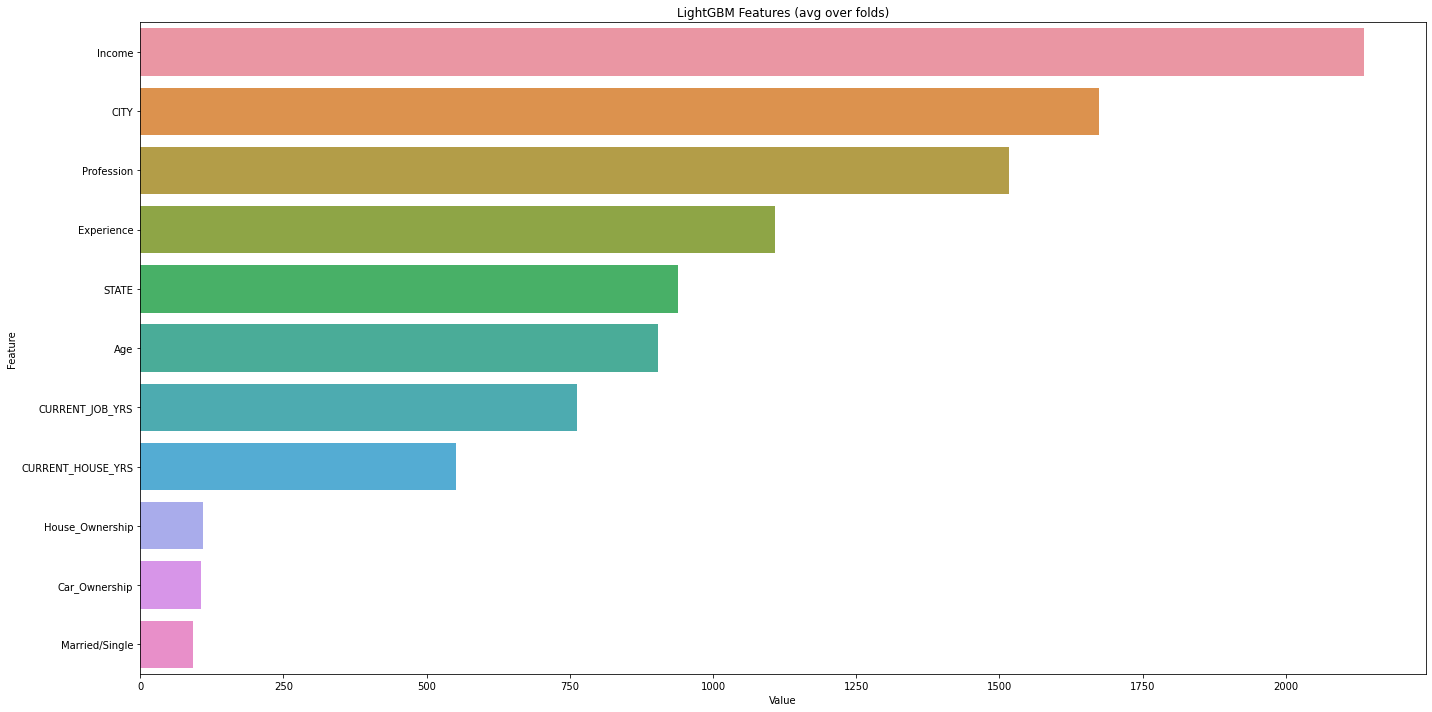

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.best_estimator_.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()